## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = mouse_study['Mouse ID'].nunique()
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
dup_mice_id = dup_mice.loc[:, 'Mouse ID'].drop_duplicates()
dup_mice_id

909    g989
Name: Mouse ID, dtype: object

In [4]:
# *** Hard code 'g989' How to put in variable for that? ***
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = mouse_study.loc[mouse_study['Mouse ID'] == 'g989', :]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cond = mouse_study['Mouse ID'].isin(dup_mice['Mouse ID'])
clean_mouse = mouse_study.drop(mouse_study[cond].index)
clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_mouse['Mouse ID'].nunique()
num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_group = clean_mouse.groupby(['Drug Regimen'])
pd.options.display.float_format = '{:.2f}'.format
drug_stats_summ = pd.DataFrame()
drug_stats_summ['Tumor Volume (mm3) Mean'] = drug_group['Tumor Volume (mm3)'].mean()
drug_stats_summ['Tumor Volume (mm3) Median'] = drug_group['Tumor Volume (mm3)'].median()
drug_stats_summ['Tumor Volume (mm3) Variance'] = drug_group['Tumor Volume (mm3)'].var()
drug_stats_summ['Tumor Volume (mm3) Std Dev'] = drug_group['Tumor Volume (mm3)'].std()
drug_stats_summ['Tumor Volume (mm3) SEM'] = drug_group['Tumor Volume (mm3)'].sem()
drug_stats_summ.T

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Tumor Volume (mm3) Mean,40.68,52.59,52.88,55.24,54.33,54.03,52.32,40.22,54.23,53.24
Tumor Volume (mm3) Median,41.56,51.78,51.82,53.70,52.51,52.29,50.45,40.67,52.43,51.82
Tumor Volume (mm3) Variance,24.95,39.29,43.13,68.55,66.17,61.17,43.85,23.49,59.45,48.53
Tumor Volume (mm3) Std Dev,4.99,6.27,6.57,8.28,8.13,7.82,6.62,4.85,7.71,6.97
Tumor Volume (mm3) SEM,0.33,0.47,0.49,0.60,0.60,0.58,0.54,0.32,0.57,0.52


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
grouped_drug = clean_mouse.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median','var','std', 'sem']})
grouped_drug

Tumor Volume (mm3)                       
                           mean median   var  std  sem
Drug Regimen                                          
Capomulin                 40.68  41.56 24.95 4.99 0.33
Ceftamin                  52.59  51.78 39.29 6.27 0.47
Infubinol                 52.88  51.82 43.13 6.57 0.49
Ketapril                  55.24  53.70 68.55 8.28 0.60
Naftisol                  54.33  52.51 66.17 8.13 0.60
Placebo                   54.03  52.29 61.17 7.82 0.58
Propriva                  52.32  50.45 43.85 6.62 0.54
Ramicane                  40.22  40.67 23.49 4.85 0.32
Stelasyn                  54.23  52.43 59.45 7.71 0.57
Zoniferol                 53.24  51.82 48.53 6.97 0.52

## Bar and Pie Charts

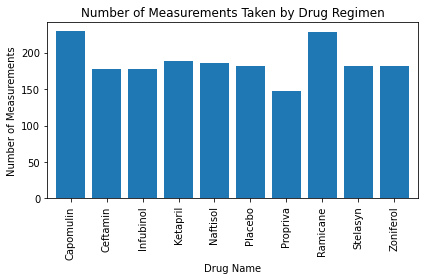

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = drug_group['Drug Regimen'].count()
drug_bar_chart = drug_count.plot(kind='bar', width=.8, title="Number of Measurements Taken by Drug Regimen")
drug_bar_chart.set_xlabel("Drug Name")
drug_bar_chart.set_ylabel("Number of Measurements")

plt.tight_layout()
plt.show()

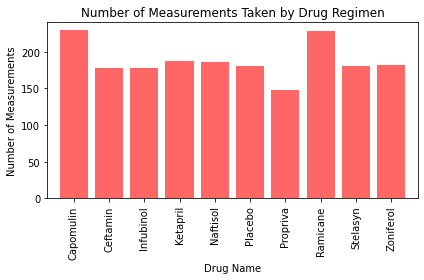

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_group))

plt.bar(x_axis, drug_count, color='r', alpha=0.6, align="center")
plt.xticks(x_axis, drug_count.index, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(drug_group)-.25)
plt.ylim(0, max(drug_count)+10)

# Set a Title and labels
plt.title("Number of Measurements Taken by Drug Regimen")
plt.xlabel("Drug Name")
plt.ylabel("Number of Measurements")

# show the graph
plt.tight_layout()
plt.show()

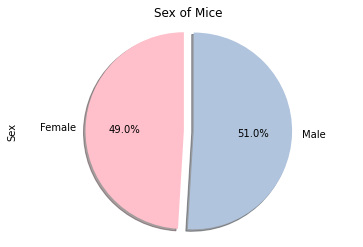

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_mouse.groupby('Sex')

gender_count = gender_group['Sex'].count()
gender_count

# Create a bar chart based off of the group series from before
gender_count.plot.pie(shadow=True, startangle=90, colors=['pink', 'lightsteelblue'], explode=(0, 0.1), autopct='%1.1f%%')
plt.title('Sex of Mice')
plt.axis('equal')
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#labels = ["Humans", "Smurfs", "Hobbits", "Ninjas"]

# The values of each section of the pie chart
#sizes = [220, 95, 80, 100]

# The colors of each section of the pie chart
#colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
#explode = (0.1, 0, 0, 0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        #autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
